#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#### Reading Dataset

In [2]:
raw_df = pd.read_csv('./spaceship-titanic.csv')
df = raw_df.copy(deep=True)    
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### EDA and Festure Engineering

In [3]:
# Irrelevant Columns
cols_to_drop = ['PassengerId', 'Name']

df = df.drop(cols_to_drop, axis=1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [4]:
df.shape

(8693, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [6]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Let's obverve the unique values of each column.

In [7]:
for column in df:
  print(column)
  print(df[column].unique(),"\n")

HomePlanet
['Europa' 'Earth' 'Mars' nan] 

CryoSleep
[False True nan] 

Cabin
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

Destination
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

Age
[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] 

VIP
[False True nan] 

RoomService
[   0.  109.   43. ... 1569. 8586.  745.] 

FoodCourt
[   0.    9. 3576. ... 3208. 6819. 4688.] 

ShoppingMall
[   0.   25.  371. ... 1085.  510. 1872.] 

Spa
[   0.  549. 6715. ... 2868. 1107. 1643.] 

VRDeck
[   0.   44.   49. ... 1164.  971. 3235.] 

Transported
[False  True] 



In [19]:
df['Cabin'].nunique()

6560

Wow that's a lot! Let's handle this column.  The value of column 'Cabin' is a string with the format Deck/Cabin_num/Side. Here we will split the 'Cabin' column and create 3 new columns Deck, Cabin_num and Side, since it will be easier to train the model on those individual data.

In [20]:
df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)

Now that we don't need 'Cabin'...

In [21]:
df = df.drop(columns=['Cabin'], axis=1)

In [22]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Cabin_num     8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [25]:
df['Cabin_num'].unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

Let's just drop 'Cabin_num'. Sounds irrelevant.

In [26]:
df = df.drop(columns='Cabin_num', axis=1)

In [27]:
for col in ['Deck', 'Side']:
  print(col)
  print(df[col].unique(),"\n")

Deck
['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T'] 

Side
['P' 'S' nan] 



Now we encode 'Side' manually.

In [28]:
df['Side'] = df['Side'].replace({
    'P': 1,
    'S': 2
})

In [29]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,1.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,2.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,2.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,2.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,2.0


##### Handling missing values by sci-kit learn's SimpleImputer

In [30]:
imputed_df = df.copy(deep=True)   

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Side']
imputer = SimpleImputer(strategy='median')
imputed_df[numerical_cols] = imputer.fit_transform(imputed_df[numerical_cols])

In [31]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck']
imputer2 = SimpleImputer(strategy='most_frequent')
imputed_df[categorical_cols] = imputer2.fit_transform(imputed_df[categorical_cols])

In [32]:
imputed_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

No missing values anymore!

In [33]:
imputed_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,1.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,2.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,2.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,2.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,2.0


##### Encoding categorical variables

In [34]:
cat_df = imputed_df.copy(deep=True)

boolean_columns = ['CryoSleep', 'VIP', 'Transported']
cat_df[boolean_columns] = cat_df[boolean_columns].astype(int)

In [35]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8693 non-null   object 
 12  Side          8693 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 883.0+ KB


One-hot encoding...

In [36]:
def one_hot_encode(data, columns):
    for column in columns:
        oh_col = pd.get_dummies(data[column], dtype=int)
        data = pd.concat([data, oh_col], axis=1)     # Adding new columns

    data.drop(columns, axis=1, inplace=True)    # Drop the columns we no longer need
    return data

In [37]:
oh_df = cat_df.copy(deep=True)

encode_cols = ['Destination', 'HomePlanet', 'Deck']
oh_df = one_hot_encode(oh_df, encode_cols)
oh_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,...,Europa,Mars,A,B,C,D,E,F,G,T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,...,1,0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2.0,...,0,0,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,2.0,...,1,0,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2.0,...,1,0,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,2.0,...,0,0,0,0,0,0,0,1,0,0


##### Varaible('Age') Discretization

In [62]:
data = oh_df.copy()
data['Age'].value_counts()[0]

178

We have 178 zero values in 'Age'. Let's handle this problem by an ML model.

In [63]:
df_nz = data.copy(deep=True)

nz_df = df_nz.drop('Transported', axis=1)
train_nz_df, test_nz_df = df_nz[df_nz['Age'] != 0], df_nz[df_nz['Age'] == 0]

# Train model
nz_model = RandomForestRegressor()
nz_model.fit(train_nz_df.drop('Age', axis=1), train_nz_df['Age'])

# Test model and get predictions
preds = nz_model.predict(test_nz_df.drop('Age', axis=1))
df_nz.loc[df_nz['Age'] == 0, 'Age'] = preds

df_nz['Age'].describe()

count    8693.000000
mean       29.134478
std        13.877251
min         1.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

Min of 'Age' is no longer 0.

In [66]:
data2 = df_nz.copy()

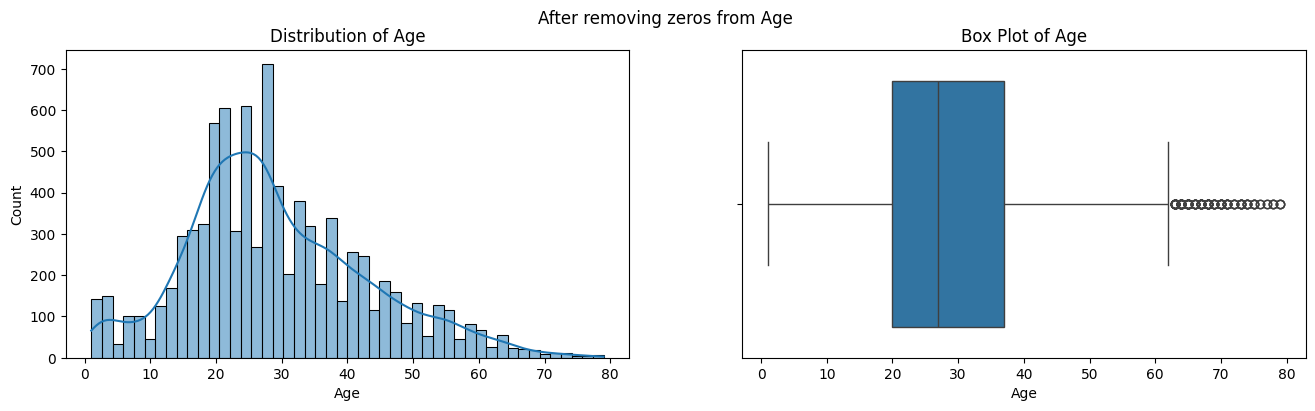

In [67]:
plt.figure(figsize=(16, 4))
plt.suptitle("After removing zeros from Age")

plt.subplot(1, 2, 1)
sns.histplot(data=data2, x='Age', kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=data2, x='Age')
plt.title('Box Plot of Age')

plt.show()

Let's handle outliers of 'Age' by performing discretization on it.

In [68]:
def group_age(df):
    labels = ['1-18', '19-25', '26-35', '36-50', '51-65', '>66']
    df['Age_range'] = pd.cut(df['Age'], bins=[-1, 18, 25, 35, 50, 65, 100], labels=labels)

In [69]:
group_age(data2)

In [70]:
data2 = data2.drop(columns=['Age'], axis=1) # We don't need 'Age' anymore so let's just drop it.
data2.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,55 Cancri e,...,Mars,A,B,C,D,E,F,G,T,Age_range
0,0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0,0,1,0,0,0,0,0,0,36-50
1,0,0,109.0,9.0,25.0,549.0,44.0,1,2.0,0,...,0,0,0,0,0,0,1,0,0,19-25
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,2.0,0,...,0,1,0,0,0,0,0,0,0,51-65
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,2.0,0,...,0,1,0,0,0,0,0,0,0,26-35
4,0,0,303.0,70.0,151.0,565.0,2.0,1,2.0,0,...,0,0,0,0,0,0,1,0,0,1-18


In [71]:
data2['Age_range'].value_counts()

26-35    2306
19-25    2083
1-18     1791
36-50    1776
51-65     653
>66        84
Name: Age_range, dtype: int64

In [72]:
oh_df2 = one_hot_encode(data2, ['Age_range']) # One-hot encoding on this new categorical column

In [73]:
engineered_data =oh_df2.copy()
engineered_data.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,55 Cancri e,...,E,F,G,T,1-18,19-25,26-35,36-50,51-65,>66
0,0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,109.0,9.0,25.0,549.0,44.0,1,2.0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,2.0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,303.0,70.0,151.0,565.0,2.0,1,2.0,0,...,0,1,0,0,1,0,0,0,0,0


#### Models

In [75]:
train_x, test_x, train_y, test_y = train_test_split(engineered_data.drop('Transported', axis=1), engineered_data['Transported'], test_size=0.1, random_state=7)

Normalization

In [76]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

KNN

In [77]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
accuracy_score(test_y, pred_y)

0.7574712643678161

SVM

In [78]:
model = SVC()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
accuracy_score(test_y, pred_y)

0.8011494252873563

Better result! Now let's try RandomForest...

In [79]:
model = RandomForestClassifier(ccp_alpha=0.001, random_state=1, criterion='gini')
model.fit(train_x, train_y)
pred_y = model.predict(test_x)
accuracy_score(test_y, pred_y)

0.8126436781609195

A bit better!